In [44]:
import datetime
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format

import requests

In [34]:
import matplotlib.dates as dt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [35]:
filename = '../data/coin_metrics.csv'
df = pd.read_csv(filename)

In [40]:
# df[df['coin_id'] == 'cosmos'].iloc[0]

In [37]:
price_volume_columns = ['symbol', 'price', 'volume_24h', 'market_cap']

(
    df[price_volume_columns]
        .sort_values('volume_24h', ascending=False)
        .head(10)
)


,symbol,price,volume_24h,market_cap
0,atom,39.13,"2,483,887,593.0","11,119,555,004.0"
25,dot,26.57,"1,778,582,619.0","28,356,006,283.0"
24,AVAX,95.27,"1,300,748,454.0","23,168,520,816.0"
9,cro,0.507124,"351,203,372.0","12,760,090,594.0"
4,band,5.8,"136,099,485.0","240,908,140.0"
8,fet,0.544105,"125,737,395.0","373,198,764.0"
12,osmo,8.33,"83,287,642.0","2,202,975,980.0"
1,kava,4.22,"81,986,583.0","614,602,716.0"
23,qnt,166.36,"71,581,040.0","2,209,896,821.0"
22,icx,1.13,"61,118,427.0","783,307,852.0"


In [38]:
df_graph = (
    df[['symbol', 'volume_24h']]
        .sort_values('volume_24h', ascending=False)
        .head(8)
)

x = np.arange(0, len(df_graph['symbol']))
y = np.array(df_graph['volume_24h'])
labels = np.array(df_graph['symbol'])

<BarContainer object of 8 artists>

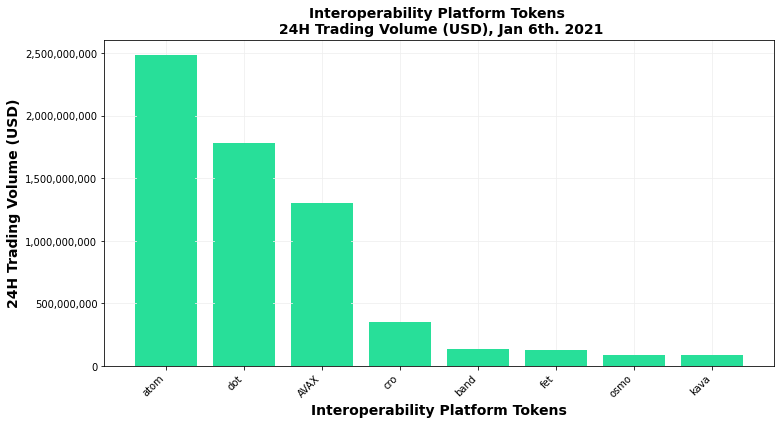

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x, y, color='#28DF99')

ax.set_title('Interoperability Platform Tokens \n 24H Trading Volume (USD), Jan 6th. 2021', weight='bold', fontsize=14)
ax.set_xlabel('Interoperability Platform Tokens', weight='bold', fontsize=14)
ax.set_ylabel('24H Trading Volume (USD)', weight='bold', fontsize=14)

ax.tick_params(axis='x', labelrotation=45)
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.get_yaxis().set_major_formatter(
    mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

# Align on the right
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

# ax.grid(color='#EFEFEF', which='major', axis='both')
ax.grid(zorder=0, color='#EFEFEF')
ax.bar(range(len(y)), y, width=0.75, color='#28DF99', align='center', zorder=3)

### Price Changes

In [45]:
def get_coin_price_on_date(coin, date):
    url = "https://api.coingecko.com/api/v3/coins/{0}/history?date={1}".format(coin, date)
    r = requests.get(url)

    result = r.json()
    price = result['market_data']['current_price']['usd']

    return float(price)

In [51]:
coin_id = 'cosmos'
day_today = datetime.datetime.today().strftime('%d-%m-%Y')
day_6m = (datetime.datetime.today() - datetime.timedelta(days=30*6)).strftime('%d-%m-%Y') # 30*6 estimate for 6 months

price_today = get_coin_price_on_date(coin_id, day_today)
price_6m = get_coin_price_on_date(coin_id, day_6m)
price_change = (price_today - price_6m) / price_6m

print ("Current price: {}".format(price_today))
print ("Price 6 months ago: {}".format(price_6m))
print ("6 month change: {:.2%}".format(price_change))


Current price: 39.03544764836552
Price 6 months ago: 13.315208567327966
6 month change: 193.16%
